In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# SVM
from sklearn.svm import LinearSVC,SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,cross_val_score

In [35]:
record=pd.read_csv('../data/food_record.csv')
score=pd.read_csv('../data/food_store.csv')

In [36]:
origin_data=pd.merge(left=record,right=score,on=['店铺ID','店铺名'])
data=origin_data.drop(['店铺名','店铺ID'],axis=1)
#### 把地区名转化为数值
data_del=pd.get_dummies(data,columns=['地区名'])
#### 新建月份列
data_del['month']=data_del['开始时间'].map(lambda t:int(t.split('-')[1]))
data_del=data_del.drop('开始时间',axis=1)

In [37]:
data_del.head()

,风险值,月售,地区名_宜兴市,地区名_新吴区,地区名_梁溪区,地区名_江阴市,地区名_滨湖区,地区名_锡山区,month
0,0.147242,627,0,0,0,0,1,0,1
1,0.187812,627,0,0,0,0,1,0,2
2,0.313739,627,0,0,0,0,1,0,3
3,0.462676,627,0,0,0,0,1,0,4
4,0.523725,627,0,0,0,0,1,0,5


In [38]:
y=data_del['风险值']
x=data_del.drop('风险值',axis=1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 

#### 设计一个函数

In [7]:
def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model,           # 网格搜索的模型
                        params,          # 搜索的参数
                        error_score=0.)  # 如果出错 正确率是0
    grid.fit(X, y)           # 拟合模型和参数
    # 经典性能参数
    print("Best Accuracy: {}".format(grid.best_score_))
    # 最佳精度的最佳参数
    print("Best Parameters: {}".format(grid.best_params_))
    # 平均拟合数据的时间（秒）
    print("Average Time to Fit (s): {}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
    # 平均预测数据的时间（秒）
    # 这个参数会帮助实时分析
    print("Average Time to Score (s): {}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))

In [26]:
params = {'n_neighbors':list(range(1,20))}
standarScaler = StandardScaler()
standarScaler.fit(X_train)
X_train_std = standarScaler.transform(X_train)
X_test_std = standarScaler.transform(X_test)
knn = KNeighborsRegressor()

get_best_model_and_accuracy(knn, params, X_train_std, y_train)

Best Accuracy: 0.9683061975953219
Best Parameters: {'n_neighbors': 19}
Average Time to Fit (s): 1.359
Average Time to Score (s): 0.569


In [19]:
standarScaler = StandardScaler()
standarScaler.fit(X_train)
X_train_std = standarScaler.transform(X_train)
X_test_std = standarScaler.transform(X_test)
for i in range(1,20):
    knn_clf = KNeighborsRegressor(n_neighbors=i)
    knn_clf.fit(X_train_std,y_train)
    score = knn_clf.score(X_test_std, y_test)
    print(score,i)

0.9413716699866892 1
0.9560030305258982 2
0.9606517131010386 3
0.9633680212816226 4
0.9647597589255416 5
0.9657894455037752 6
0.96641063807996 7
0.9670261097356384 8
0.9674625742953296 9
0.9677039670266726 10
0.9679201478735039 11
0.968053546618559 12
0.9681806421984493 13
0.9682357505897439 14
0.968307857718113 15
0.9683887848536281 16
0.9684384584454121 17
0.9684767395799965 18
0.9684823877598498 19


In [54]:
standarScaler = StandardScaler()
standarScaler.fit(X_train)
X_train_std = standarScaler.transform(X_train)
X_test_std = standarScaler.transform(X_test)
knn_model = KNeighborsRegressor(n_neighbors=12)
knn_model.fit(X_train_std,y_train)

KNeighborsRegressor(n_neighbors=12)

In [55]:
v=knn_model.predict(X_test_std[1:10])
v

array([0.19384619, 0.98838819, 0.16254858, 0.94243285, 0.12449431,
       0.54908697, 0.70754677, 0.32056742, 0.27015269])

In [56]:
y_test[1:10]

28645    0.161838
32581    0.998827
66676    0.162427
5402     0.894956
14000    0.107834
29311    0.527209
55122    0.685846
67696    0.267605
65980    0.289949
Name: 风险值, dtype: float64

### svm

In [61]:
y.median()

0.43113782679284735

{'whiskers': [<matplotlib.lines.Line2D at 0x2280cebbdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x2280cec44c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2280cebba60>],
 'medians': [<matplotlib.lines.Line2D at 0x2280cec4b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2280cec4ee0>],
 'means': []}

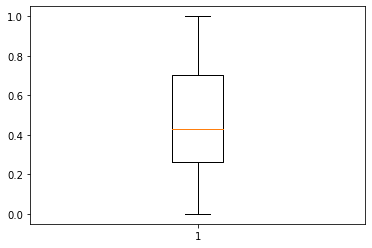

In [66]:
plt.boxplot(y)

In [43]:
# params = {'svc__C':[1e0], 
#                'svc__kernel':['poly'],
#                'svc__gamma':[1e0]
#               }

# svc=SVC()
# fit_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('svc', svc)])

# get_best_model_and_accuracy(fit_pipeline, params, X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 164, in fit
    y = self._validate_targets(y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 544, in _validate_targets
    check_classification_targets(y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown lab

ValueError: Unknown label type: 'continuous'

### 聚类算法

In [101]:
#获取数据
# 创建KMeans类对象

y=data['风险值']
from sklearn.cluster import KMeans
kmeans = KMeans(3, 'k-means++')
# 调用fit方法
kmeans.fit(pd.DataFrame(y))
print(kmeans.labels_)
print(kmeans.cluster_centers_)
print(kmeans.n_clusters)
result = kmeans.predict([[0.78]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass init=k-means++ as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[2 2 2 ... 0 2 2]
[[0.51856987]
 [0.90606713]
 [0.2274229 ]]
3


In [99]:
#获取数据
t=pd.DataFrame(y)
# 创建KMeans类对象
from sklearn.cluster import KMeans
kmeans = KMeans(3, 'k-means++')
# 调用fit方法
kmeans.fit(t)
a = t[kmeans.labels_==0]  #按照0,1,2类别过滤
b=a.sort_values(by='风险值') #排序
print("min:",b.min())
print("max:",b.max())

#查看数据
print(t[kmeans.labels_==0])
#查看类别
print(kmeans.labels_)
#查看中心点
print(kmeans.cluster_centers_)
result = kmeans.predict([[0.78]])#预测

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass init=k-means++ as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


min: 风险值    0.380441
dtype: float64
max: 风险值    0.718954
dtype: float64
            风险值
3      0.462676
4      0.523725
5      0.590343
6      0.626516
7      0.462147
...         ...
70370  0.539875
70371  0.595458
70373  0.653710
70374  0.635473
70375  0.549814

[23209 rows x 1 columns]
[1 1 1 ... 1 1 1]
[[0.52817578]
 [0.23270539]
 [0.90992241]]
